<a href="https://colab.research.google.com/github/ValentineKarimi/Moringa-School-CoreWeek-7IP/blob/master/Moringa_School_Core_Week_7_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Defining the Question
**a) Specifying the Question**

I have been recruited as an analyst to help provide the best model for future prediction of prices for houses given some  data on the features of the houses.


**b) Defining the Metric for Success**

Find the best model to best predict the prices of a house given various features values

**c) Understanding the context**
 
 There are various regression models used in machine learning. Depending on the features , accuracy and MSE, a good regression model should be choosen, so it is easier to predict the prices of houses for clients who will be buying houses in future 

**d) Recording the Experimental Design**

Reading the Data

Tidying the Dataset

Exploratory Analysis

Carrying out various regression models 

Follow-up questions


**e) Data Relevance**

Below is the dataset glossary:

Id 

price  - Price of the house

bedrooms - Number of Bedrooms

bathrooms - Number of Bathrooms

sqft_living - Square feet area of living area

sqft_lot  - Square feet area of parking Layout


floors - Number of Floors

waterfront - Whether waterfront is there or not

view - Number of Views

grade - Grades

sqft_above

sqft_basement - Square feet area off basement

yr_built - Year the house is built

yr_renovated - Year the house is renovated

zipcode - zipcode os the house

lat : Latitude of the house

lon : Longitude of the house

sqft_living15

sqft_lot15

# Reading the data 

In [1232]:
#Importing libraries 
import numpy as np
import pandas as pd  


from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet

import seaborn as sns 

import matplotlib.pyplot as plt 

%matplotlib inline

In [1233]:
#loading dataset
house_data = pd.read_csv('/content/Independent Project Week 7 - house_data.csv')


In [1234]:
# Previewing the top and bottom part of the dataset
display("house data preview")
display(house_data.head(3))
display(house_data.tail(3))

'house data preview'

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [1235]:
# Check The number of records in dataset
print('House_data dataset has ',house_data.shape[0],'records and ',house_data.shape[1], 'rows' )


House_data dataset has  21613 records and  20 rows


In [1236]:
# Check  information on datatypes of datasets 
display("Information on house data")
display(house_data.info())
#Checking the columns in datasets
display("House_data columns")
display(house_data.columns)

'Information on house data'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

None

'House_data columns'

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [1237]:
#A summary of the the dataset
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [1238]:
#Drop the irrelevant columns 
to_drop = [ 'sqft_living15', 'sqft_lot15'] # I chose the 'sqft_living', 'sqft_lot' instead to use 
house_data.drop(to_drop, axis=1,inplace=True)


# Tidying the dataset 

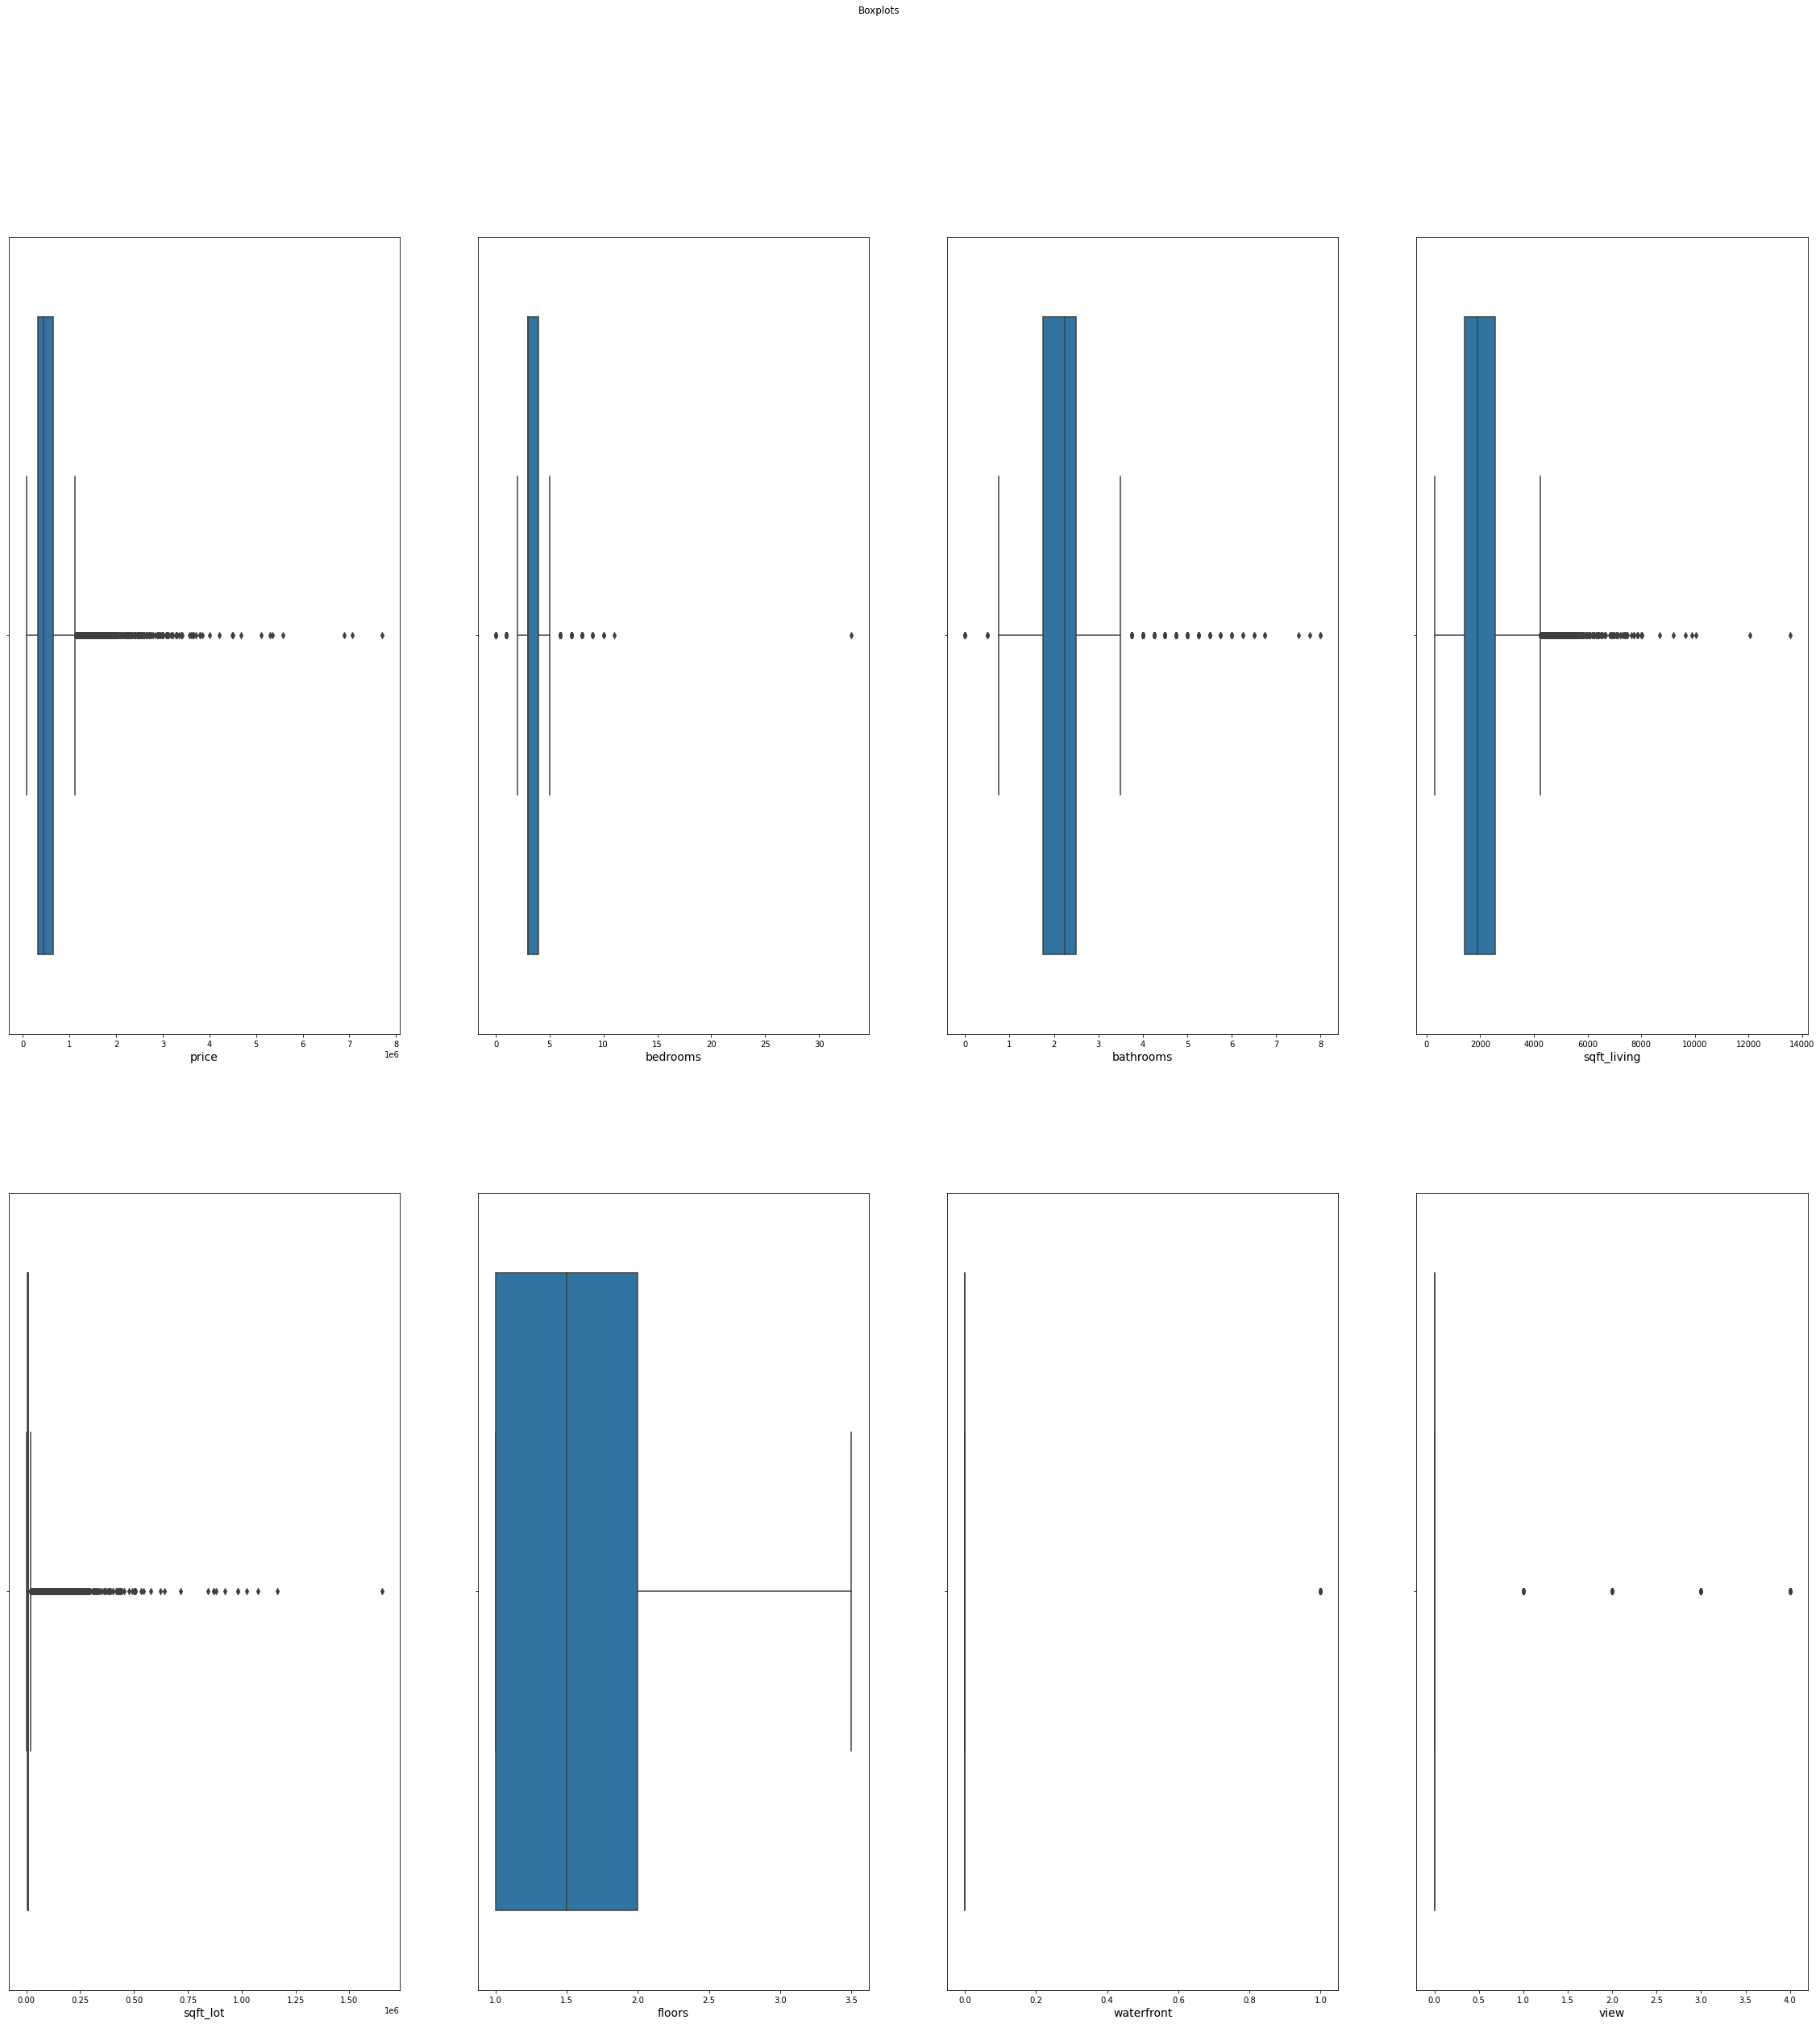

In [1239]:
# Checking for Outliers
fig, ((ax1, ax2,ax3,ax4), (ax5, ax6,ax7,ax8)  ) = plt.subplots(2,4, figsize=(40, 40))
fig.suptitle('Boxplots')
ax1.set_xlabel('xlabel',fontsize=14)
ax2.set_xlabel('xlabel',fontsize=14)
ax3.set_xlabel('xlabel',fontsize=14)
ax4.set_xlabel('xlabel',fontsize=14)
ax5.set_xlabel('xlabel',fontsize=14)
ax6.set_xlabel('xlabel',fontsize=14)
ax7.set_xlabel('xlabel',fontsize=14)
ax8.set_xlabel('xlabel',fontsize=14)


sns.boxplot(house_data['price'], ax=ax1)
sns.boxplot(house_data['bedrooms'], ax=ax2)
sns.boxplot(house_data['bathrooms'], ax=ax3)
sns.boxplot(house_data['sqft_living'], ax=ax4)
sns.boxplot(house_data['sqft_lot'], ax=ax5)
sns.boxplot(house_data['floors'], ax=ax6)
sns.boxplot(house_data['waterfront'], ax=ax7)
sns.boxplot(house_data['view'], ax=ax8)

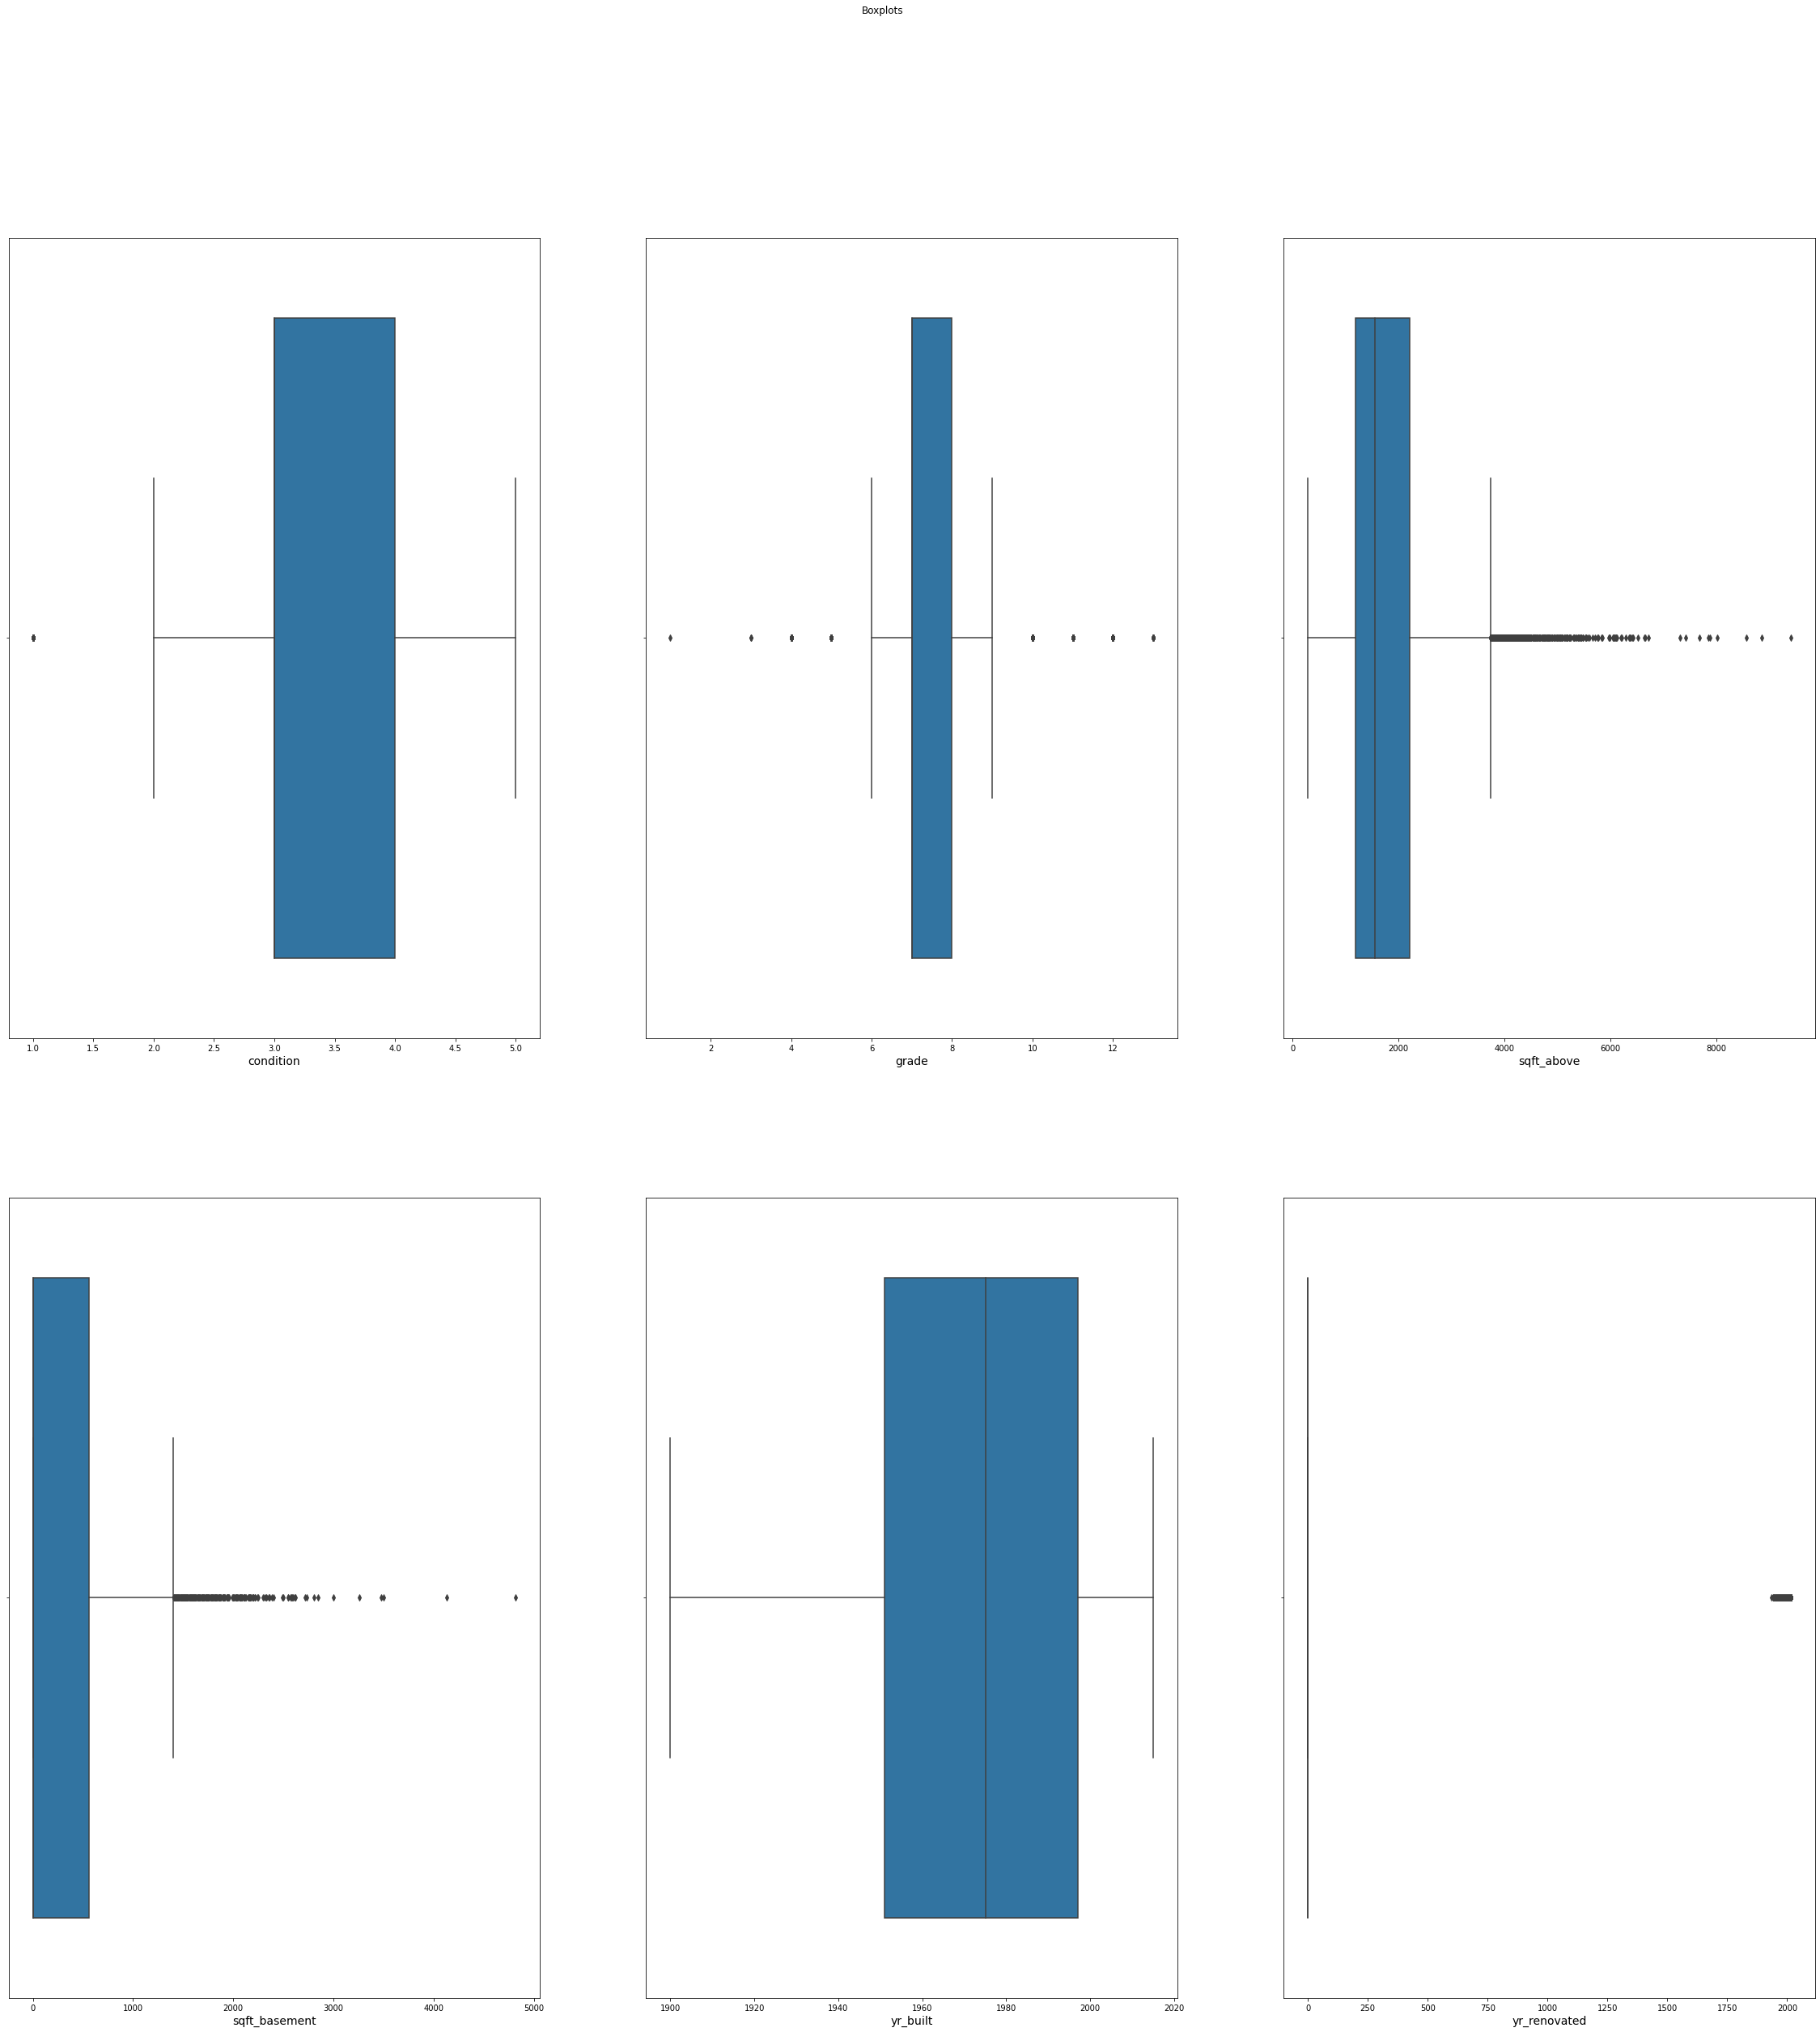

In [1240]:
#%% [code]
fig,((ax9,ax10,ax11), (ax12,ax13,ax14))= plt.subplots(2,3, figsize=(40, 40))

fig.suptitle('Boxplots')
ax9.set_xlabel('xlabel',fontsize=14)
ax10.set_xlabel('xlabel',fontsize=14)
ax11.set_xlabel('xlabel',fontsize=14)
ax12.set_xlabel('xlabel',fontsize=14)
ax13.set_xlabel('xlabel',fontsize=14)
ax14.set_xlabel('xlabel',fontsize=14)


sns.boxplot(house_data['condition'], ax=ax9)
sns.boxplot(house_data['grade'], ax=ax10)
sns.boxplot(house_data['sqft_above'], ax=ax11)
sns.boxplot(house_data['sqft_basement'], ax=ax12)
sns.boxplot(house_data['yr_built'], ax=ax13)
sns.boxplot(house_data['yr_renovated'], ax=ax14)

In [1241]:
#Dealing with outliers 
Q1 = house_data.quantile(0.25)
Q3 = house_data.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range and stores the result in the data frame 'df_out'
# ---
# 
house_data_out = house_data[~((house_data < (Q1 - 1.5 * IQR)) | (house_data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
# ---
# 
print(house_data_out.shape)

# Printing the shape of our old dataset
# ---
#
print(house_data.shape)

(15100, 18)
(21613, 18)


In [1242]:
#Checking if there any anomalies 
Q1= house_data_out.quantile(0.25)
Q3 =house_data_out.quantile(0.75)
IQR = Q3-Q1
display('0.25 quartile')
print(Q1)
print('----------------------------------------')
display('0.75 quartile')
print(Q3)
print('----------------------------------------')
display('0.5 quartile')
print(IQR)

'0.25 quartile'

id               2.313901e+09
price            3.000000e+05
bedrooms         3.000000e+00
bathrooms        1.500000e+00
sqft_living      1.350000e+03
sqft_lot         4.725000e+03
floors           1.000000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        3.000000e+00
grade            7.000000e+00
sqft_above       1.140000e+03
sqft_basement    0.000000e+00
yr_built         1.952000e+03
yr_renovated     0.000000e+00
zipcode          9.803300e+04
lat              4.745680e+01
long            -1.223330e+02
Name: 0.25, dtype: float64
----------------------------------------


'0.75 quartile'

id               7.443001e+09
price            5.475000e+05
bedrooms         4.000000e+00
bathrooms        2.500000e+00
sqft_living      2.210000e+03
sqft_lot         9.000000e+03
floors           2.000000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        4.000000e+00
grade            8.000000e+00
sqft_above       1.910000e+03
sqft_basement    4.500000e+02
yr_built         1.999000e+03
yr_renovated     0.000000e+00
zipcode          9.811800e+04
lat              4.768340e+01
long            -1.221510e+02
Name: 0.75, dtype: float64
----------------------------------------


'0.5 quartile'

id               5.129100e+09
price            2.475000e+05
bedrooms         1.000000e+00
bathrooms        1.000000e+00
sqft_living      8.600000e+02
sqft_lot         4.275000e+03
floors           1.000000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        1.000000e+00
grade            1.000000e+00
sqft_above       7.700000e+02
sqft_basement    4.500000e+02
yr_built         4.700000e+01
yr_renovated     0.000000e+00
zipcode          8.500000e+01
lat              2.266000e-01
long             1.820000e-01
dtype: float64


In [1243]:
# Checking for missing values 
display('Without outliers dataset')
display(house_data_out.isnull().sum())

'Without outliers dataset'

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
dtype: int64

#Exploratory Analysis 

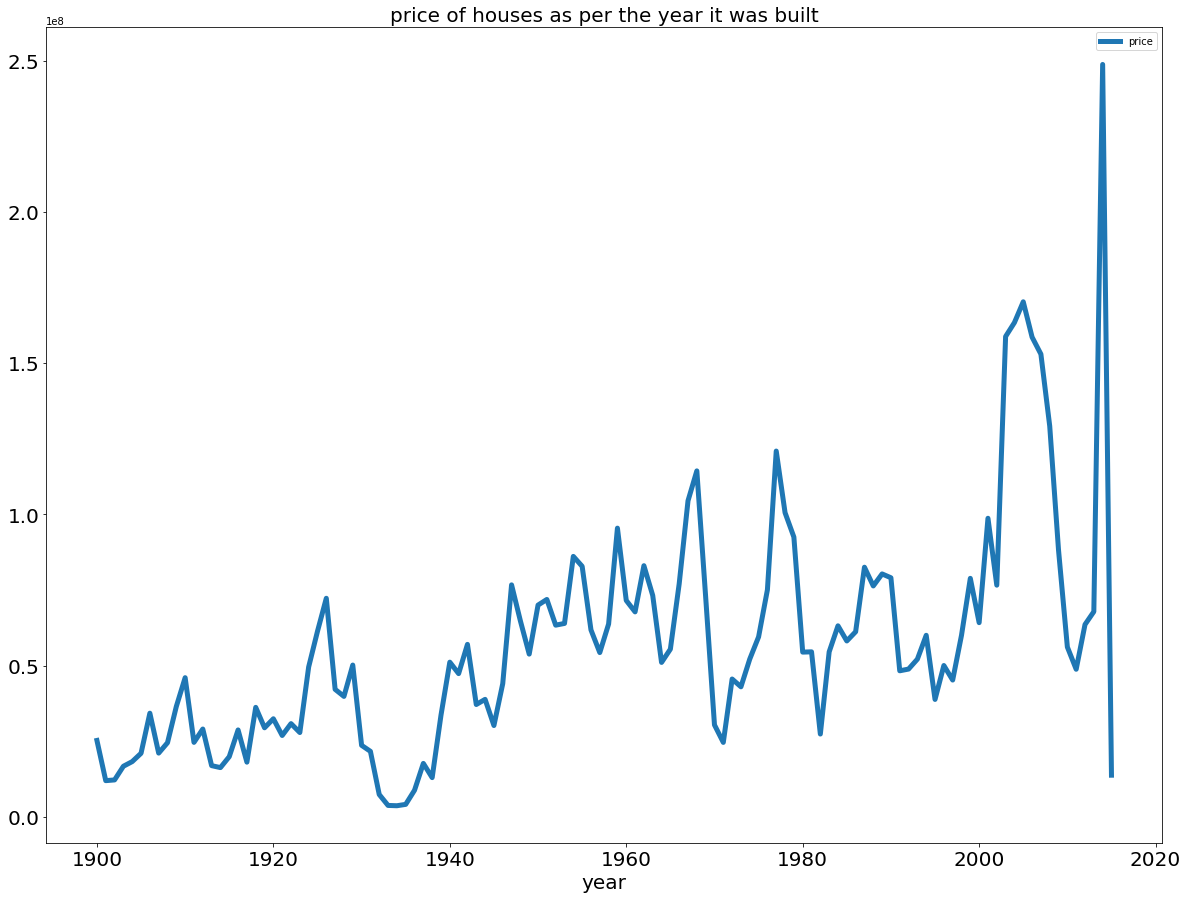

In [1244]:
#See the change of prices according to the year it was built 
GB = house_data_out.groupby([house_data_out.yr_built]).sum()
GB.price.plot(figsize=(20,15), linewidth=5, fontsize=20)
plt.title('price of houses as per the year it was built', fontsize=20)
plt.xlabel('year', fontsize=20);
plt.legend()

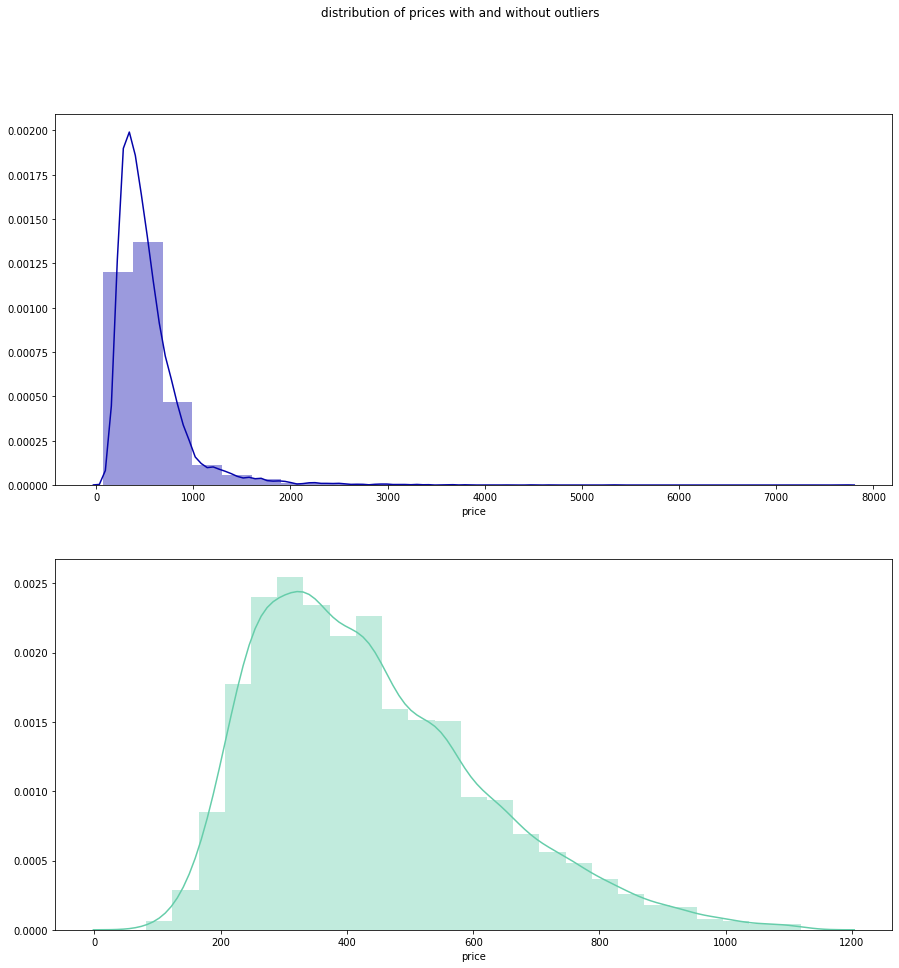

In [1245]:
#Distribution of prices in 1000
fig,((ax1,ax2))= plt.subplots(2,1, figsize=(15, 15))
fig.suptitle('distribution of prices with and without outliers')
sns.distplot(house_data.price/1000, bins=25, color='#0504aa', ax=ax1)
sns.distplot(house_data_out.price/1000, bins=25, color='mediumaquamarine', ax=ax2)


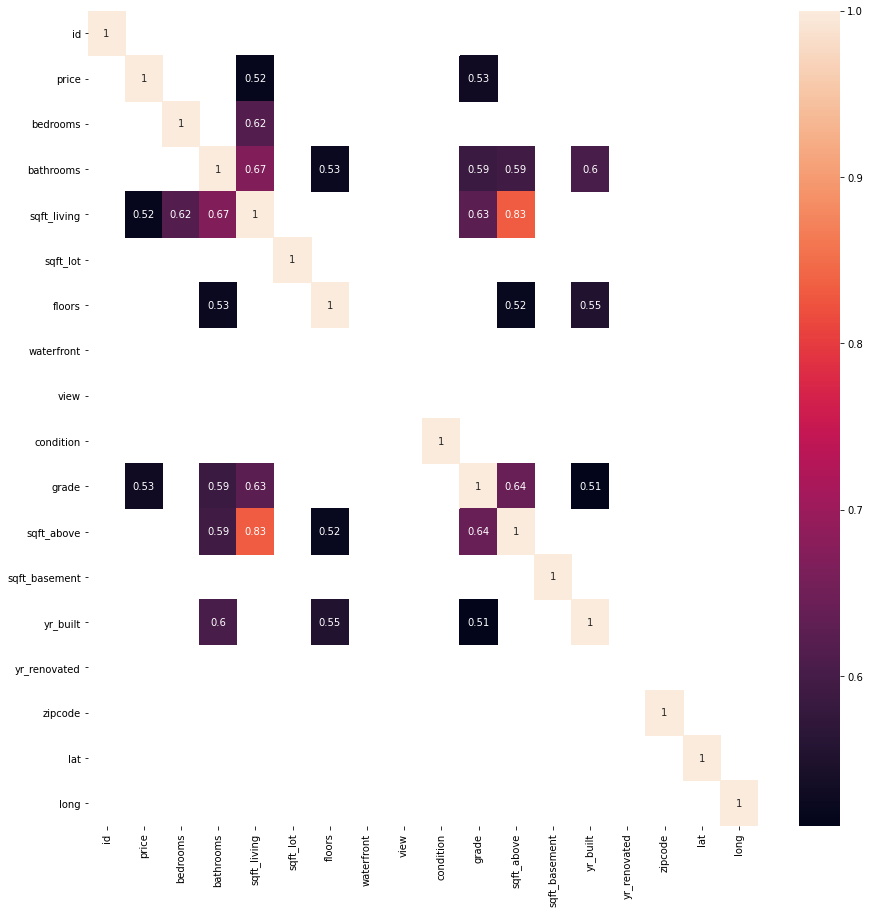

In [1246]:
#correlation of each variable 
correlation_mat = house_data_out.corr()
Greaterthan= correlation_mat[correlation_mat > 0.5]
plt.show()
plt.figure(figsize=(15,15))
sns.heatmap(Greaterthan,annot=True )
plt.show()

# Multi-linear regression 


Assumptions of linear regression 

Data has no outliers 

Data has no multi-colinearity 

The dependent variable has a linear relationship with the independent variables 

Independent variables should be continous 

There is no heteroskedasticity present 

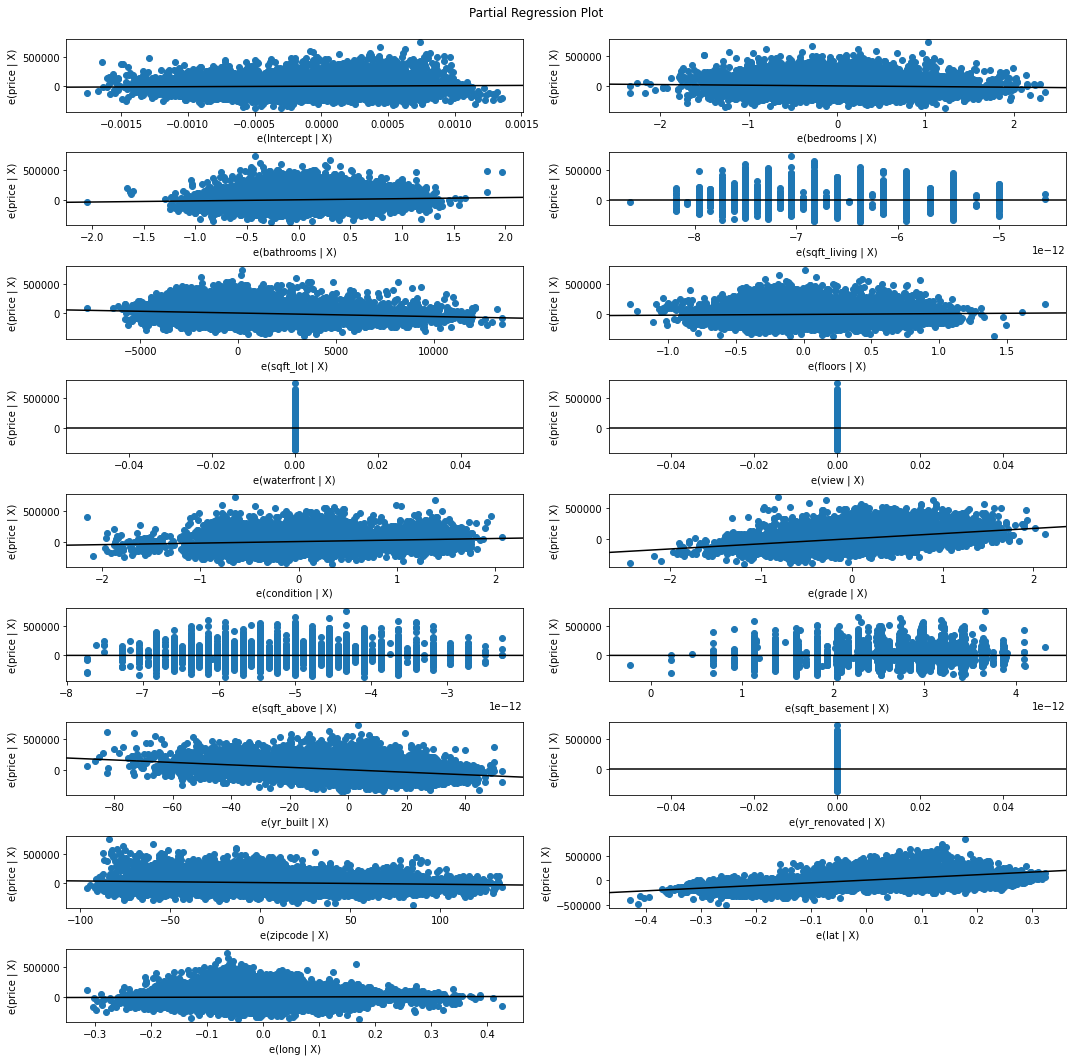

In [1247]:
#Checking if the variables that had a linear relationship with price  

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import plot_partregress_grid
fig = plt.figure(figsize=(15, 15))
results = smf.ols('price ~ bedrooms +	bathrooms+	sqft_living +	sqft_lot +	floors+	waterfront +	view +condition +	grade	+sqft_above +	sqft_basement +	yr_built+	yr_renovated +	zipcode +	lat	+long ' ,
                   data=house_data_out).fit() 
plot_partregress_grid(results, fig=fig)
plt.show()

Waterfront, views and year renovated are not continous although the all variables have a linear relationship 

In [1248]:
features = house_data_out.iloc[:,[2,3,4,5.8,9,10,11,12,13,15,16,17]]
y = house_data_out.iloc[:,1]


In [1249]:
#Detecting multi-colinearity 
# Remove the serial and admit chance columns, we want to focus on our independent variables only.
independent_only = features
# Let's display the correlations between the variables
correlations = independent_only.corr()
correlations

,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long
bedrooms,1.000000,0.445595,0.615481,0.199400,0.028188,0.293642,0.487218,0.242615,0.161358,-0.187943,-0.081569,0.189568
bathrooms,0.445595,1.000000,0.670686,-0.087214,-0.158077,0.585699,0.593796,0.156973,0.604064,-0.247878,-0.053014,0.297995
sqft_living,0.615481,0.670686,1.000000,0.161263,-0.070971,0.625756,0.832635,0.324104,0.352845,-0.237093,-0.025313,0.312159
sqft_lot,0.199400,-0.087214,0.161263,1.000000,0.150771,-0.031919,0.114082,0.086757,-0.105786,-0.256380,-0.142710,0.225110
condition,0.028188,-0.158077,-0.070971,0.150771,1.000000,-0.190580,-0.190575,0.201591,-0.404793,0.000612,0.013937,-0.101587
grade,0.293642,0.585699,0.625756,-0.031919,-0.190580,1.000000,0.640633,-0.001498,0.510038,-0.212442,0.061998,0.237173
sqft_above,0.487218,0.593796,0.832635,0.114082,-0.190575,0.640633,1.000000,-0.254067,0.474205,-0.305483,-0.100962,0.423201
sqft_basement,0.242615,0.156973,0.324104,0.086757,0.201591,-0.001498,-0.254067,1.000000,-0.193819,0.107759,0.128255,-0.177748
yr_built,0.161358,0.604064,0.352845,-0.105786,-0.404793,0.510038,0.474205,-0.193819,1.000000,-0.342915,-0.190732,0.434084
zipcode,-0.187943,-0.247878,-0.237093,-0.256380,0.000612,-0.212442,-0.305483,0.107759,-0.342915,1.000000,0.302346,-0.581385


In [1250]:
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)


,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long
bedrooms,1.716832,-0.322139,-1.773572e-01,-0.164857,-0.044098,0.230765,-8.239952e-01,-4.770381e-01,0.134276,0.065966,0.074146,0.056438
bathrooms,-0.322139,2.795880,-1.705904e+00,0.399818,-0.165542,-0.269975,6.043773e-01,1.194133e-01,-1.184687,0.069912,-0.041307,0.029056
sqft_living,-0.173089,-1.706763,4.800584e+13,-0.386593,1.245989,-0.635919,-4.695532e+13,-2.748870e+13,1.585309,0.280773,0.055270,-0.213274
sqft_lot,-0.164857,0.399818,-3.842522e-01,1.281874,-0.086642,0.054617,6.064754e-02,-2.536631e-02,0.157625,0.225841,0.114068,-0.227624
condition,-0.044098,-0.165542,1.245638e+00,-0.086642,1.274001,-0.010479,-1.087994e+00,-8.018757e-01,0.615980,0.151943,0.049005,-0.032945
grade,0.230765,-0.269975,-6.284600e-01,0.054617,-0.010479,2.204390,-6.792167e-01,-2.214837e-02,-0.583777,0.163770,-0.322928,0.277500
sqft_above,-0.819101,0.610631,-4.695532e+13,0.063060,-1.088901,-0.670637,4.592779e+13,2.688716e+13,-1.226308,-0.398622,0.042850,-0.290768
sqft_basement,-0.474994,0.119184,-2.748870e+13,-0.023984,-0.802252,-0.017268,2.688716e+13,1.574035e+13,-0.471569,-0.235648,-0.120123,0.165041
yr_built,0.134276,-1.184687,1.587248e+00,0.157625,0.615980,-0.583777,-1.228205e+00,-4.726796e-01,2.532772,0.169777,0.325465,-0.516020
zipcode,0.065966,0.069912,2.771636e-01,0.225841,0.151943,0.163770,-3.950921e-01,-2.335815e-01,0.169777,1.719993,-0.334619,0.805121


Dealing with multi-colinearity 

In [1251]:
x =house_data_out.iloc[:,[2,5,9,10,12,13,15,16,17]]

In [1252]:
#Detecting multi-colinearity 
# Remove the serial and admit chance columns, we want to focus on our independent variables only.
independent_only = x
# Let's display the correlations between the variables
correlations = independent_only.corr()
correlations

,bedrooms,sqft_lot,condition,grade,sqft_basement,yr_built,zipcode,lat,long
bedrooms,1.000000,0.199400,0.028188,0.293642,0.242615,0.161358,-0.187943,-0.081569,0.189568
sqft_lot,0.199400,1.000000,0.150771,-0.031919,0.086757,-0.105786,-0.256380,-0.142710,0.225110
condition,0.028188,0.150771,1.000000,-0.190580,0.201591,-0.404793,0.000612,0.013937,-0.101587
grade,0.293642,-0.031919,-0.190580,1.000000,-0.001498,0.510038,-0.212442,0.061998,0.237173
sqft_basement,0.242615,0.086757,0.201591,-0.001498,1.000000,-0.193819,0.107759,0.128255,-0.177748
yr_built,0.161358,-0.105786,-0.404793,0.510038,-0.193819,1.000000,-0.342915,-0.190732,0.434084
zipcode,-0.187943,-0.256380,0.000612,-0.212442,0.107759,-0.342915,1.000000,0.302346,-0.581385
lat,-0.081569,-0.142710,0.013937,0.061998,0.128255,-0.190732,0.302346,1.000000,-0.157618
long,0.189568,0.225110,-0.101587,0.237173,-0.177748,0.434084,-0.581385,-0.157618,1.000000


In [1253]:
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,bedrooms,sqft_lot,condition,grade,sqft_basement,yr_built,zipcode,lat,long
bedrooms,1.260310,-0.180608,-0.037815,-0.327199,-0.331505,-0.049181,0.037188,0.100082,-0.124676
sqft_lot,-0.180608,1.215587,-0.059231,0.015569,-0.072306,0.320117,0.210414,0.124499,-0.258968
condition,-0.037815,-0.059231,1.262666,0.005389,-0.160238,0.548675,0.158310,0.044704,-0.020073
grade,-0.327199,0.015569,0.005389,1.516482,-0.035304,-0.757162,0.124251,-0.288357,0.048585
sqft_basement,-0.331505,-0.072306,-0.160238,-0.035304,1.195042,0.110819,-0.023427,-0.126145,0.202023
yr_built,-0.049181,0.320117,0.548675,-0.757162,0.110819,2.025532,0.195277,0.311398,-0.524361
zipcode,0.037188,0.210414,0.158310,0.124251,-0.023427,0.195277,1.715010,-0.330890,0.788194
lat,0.100082,0.124499,0.044704,-0.288357,-0.126145,0.311398,-0.330890,1.197476,-0.135293
long,-0.124676,-0.258968,-0.020073,0.048585,0.202023,-0.524361,0.788194,-0.135293,1.768815


No multi-colinearity detected as the VIF are 1 and 2 only and none is heading to 5 or greater than 5

In [1254]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 100)

In [1255]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm = lm.fit(x_train,y_train) 

In [1256]:
lm.coef_

array([ 2.78773327e+04, -6.08372677e+00,  2.58227753e+04,  1.30795515e+05,
        4.29941442e+01, -1.62327648e+03, -2.24363190e+02,  5.30011713e+05,
        1.27274244e+05])

In [1257]:

coefficients = pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1)
coof= coefficients.set_axis(['Variable', 'Co-effients'], axis=1, inplace=False)
coof

,Variable,Co-effients
0,bedrooms,27877.332682
1,sqft_lot,-6.083727
2,condition,25822.775306
3,grade,130795.514715
4,sqft_basement,42.994144
5,yr_built,-1623.276482
6,zipcode,-224.363190
7,lat,530011.713090
8,long,127274.243744


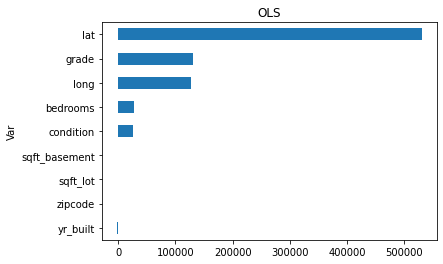

In [1258]:
# Plot the coefficients in descending order
w = pd.DataFrame()
w['Var'] = x.columns
w = w.set_index('Var') # Set the variable names as the index
w['beta'] = lm.coef_

w = w.sort_values(by='beta')
w['beta'].plot.barh()
plt.title('OLS')
fig.tight_layout()
plt.show()

We can see that coefficients of latitude, grade, longitude , bedrooms and condition is much higher as compared to rest of the coefficients. Therefore the prices of the houses would be more driven by these features.

 We can reduce the magnitude of coefficients in our model by carrying out different types of regression techniques which uses regularization to overcome this problem.

In [1259]:
#When all the independent variables are at 0 
lm.intercept_

14883239.600982131

The price of a house is 14883239 when the other variables are at 0 

In [1260]:
y_pred = lm.predict(x_test)

In [1261]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5657518335882237

The linear model will have a 56.57% accuracy in predicting the prices of the houses in future 

In [1262]:
print("The mean squared error for the linear model:",metrics.mean_squared_error(y_test, y_pred))

The mean squared error for the linear model: 13939180229.833775


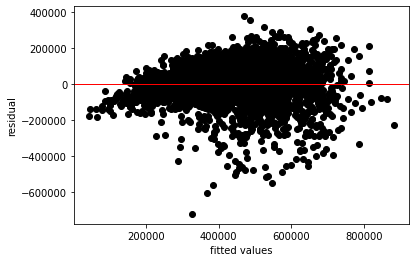

In [1263]:
#residual plot 
import matplotlib.pyplot as plt
residuals = np.subtract(y_pred, y_test)
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

This residual plot shows that there is no overfitting and underfitting of data
And having more residuals close to 0 indicating model is fairly correct in predicting 

In [1264]:
#Checking for heteroskedascicity of model 
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')


inf
the variances are homogeneous!


# Quantile Regression 

We are trying to figure out whether the co-effecients change when we have low, medium and high prices of houses given the Principapal Components of the model 

In [1265]:
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.decomposition import PCA
import statsmodels.formula.api as sm

In [1266]:
drop=['id','price']
X = house_data.drop(drop, axis=1)
y = house_data['price']

In [1267]:
pca = PCA(n_components = 10)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PrincComp_1', 'PrincComp_2','PrincComp_3','PrincComp_4','PrincComp_5', 'PrincComp_6' ,'PrincComp_7' , 'PrincComp_8' ,'PrincComp_9' , 'PrincComp_10'])
principalDf 


,PrincComp_1,PrincComp_2,PrincComp_3,PrincComp_4,PrincComp_5,PrincComp_6,PrincComp_7,PrincComp_8,PrincComp_9,PrincComp_10
0,-9462.590517,-1054.098648,-233.813373,-39.272206,92.649403,-5.214644,0.144025,-0.044639,-0.104897,0.357905
1,-7861.425060,701.048551,264.193398,1878.443944,32.636903,-12.236434,0.461048,-1.249911,0.464381,-0.081154
2,-5115.705542,-1651.331300,-163.007806,-38.470837,-58.597938,35.997963,-0.554840,-0.542043,0.191609,0.735057
3,-10109.910710,-459.022363,808.135601,-166.105498,39.724442,-14.292398,0.962893,0.437639,-0.162676,-1.464328
4,-7028.852738,-363.968921,-320.973101,-42.773689,-5.865278,-13.499730,-0.298579,0.020669,-0.324646,0.190359
...,...,...,...,...,...,...,...,...,...,...
21608,-13978.884645,-537.763870,-298.077559,-42.019305,15.653128,-41.618739,-0.206690,0.377491,-0.495419,0.040703
21609,-9291.102361,531.774078,-430.017235,-45.255207,71.848341,-44.115506,0.778501,0.124545,0.160999,-0.104029
21610,-13763.723162,-1255.072969,-209.391167,-39.536525,46.879393,-54.690831,-0.499925,-0.619977,0.269419,-0.133392
21611,-12721.364379,-445.506099,-310.630060,-42.862345,-57.067478,-23.315924,-0.346969,0.268121,-0.382634,0.164151


In [1268]:
principalDf['price'] = y

In [1269]:
variables= pd.DataFrame(pca.components_ ,columns=X.columns,index = ['PrincComp_1', 'PrincComp_2','PrincComp_3','PrincComp_4','PrincComp_5', 'PrincComp_6' ,'PrincComp_7' , 'PrincComp_8' ,'PrincComp_9' , 'PrincComp_10'])
variables.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
PrincComp_1,7.137402e-07,1.633481e-06,0.003835,0.999986,-6.691263e-08,4.515275e-08,0.000001,-1.409909e-07,0.000003,0.003672,0.000164,0.000038,0.000074,-0.000167,-2.866066e-07,7.804848e-07
PrincComp_2,4.400233e-04,4.866091e-04,0.751185,-0.005295,1.996912e-04,6.794629e-06,0.000155,-5.434074e-05,0.000770,0.652266,0.098919,0.009018,0.016903,-0.009444,5.884554e-06,2.964142e-05
PrincComp_3,2.782903e-04,1.282282e-04,0.316321,0.000445,-3.812211e-04,1.062965e-05,0.000329,2.480998e-04,-0.000093,-0.488855,0.805176,-0.014362,0.110609,0.014556,2.731912e-05,-6.080144e-05
PrincComp_4,-7.609743e-05,-6.071703e-07,-0.047920,-0.000033,5.281248e-05,1.725857e-05,0.000114,-1.394761e-04,-0.000057,0.043650,-0.091570,-0.015405,0.993538,0.007621,4.519706e-06,-1.791206e-05
PrincComp_5,-9.331661e-04,-1.094686e-03,0.003308,0.000107,6.452988e-04,7.020539e-05,0.001742,-2.063219e-04,-0.000333,0.014789,-0.011481,-0.164602,-0.011665,0.986104,7.176622e-04,-1.299736e-03


In [1270]:
import statsmodels.formula.api as smf

mod = smf.quantreg('price ~ PrincComp_1 + PrincComp_2 +PrincComp_3 + PrincComp_4 +PrincComp_5 +PrincComp_6 + PrincComp_7 +PrincComp_8 + PrincComp_9 +PrincComp_10' , principalDf)

res1 = mod.fit(q=.25)
print(res1.summary())
res2 = mod.fit(q=.5)
print(res2.summary())
res3 = mod.fit(q=.75)
print(res3.summary())


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.3076
Model:                       QuantReg   Bandwidth:                   2.176e+04
Method:                 Least Squares   Sparsity:                    3.932e+05
Date:                Fri, 25 Sep 2020   No. Observations:                21613
Time:                        14:41:02   Df Residuals:                    21602
                                        Df Model:                           10
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      4.14e+05   1163.432    355.830      0.000    4.12e+05    4.16e+05
PrincComp_1      0.6476      0.025     25.448      0.000       0.598       0.697
PrincComp_2    136.8961      0.892    153.468      0.000     135.148     138.644
PrincComp_3     55.6094      2.211     25.

In [1271]:
from sklearn.model_selection import train_test_split
X = principalDf.drop('price', axis=1)
y = principalDf['price']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [1272]:
import statsmodels.regression.quantile_regression as Q_reg

quantiles = [0.25, 0.5, 0.75]

# Get the model, and the cofficients in (a) - (b)
def Qreg(q):
   # (a) Modeling 
   mod = Q_reg.QuantReg(y_train, x_train).fit(q=q)
    
   # (b) Get the coefficients and the lower and upper bounds
   coefs = pd.DataFrame()
   coefs['param'] = mod.params
   coefs = pd.concat([coefs,mod.conf_int()],axis=1) # "mod.conf_int" will give the lower and upper bounds
   coefs['q'] = q
   coefs.columns = ['coef','beta_lower','beta_upper','quantile']
    
   return coefs

Qreg_coefs = pd.DataFrame()
for q in quantiles:
    coefs = Qreg(q)
    Qreg_coefs = pd.concat([Qreg_coefs,coefs])

# Get the R-squared for Q=0.25,0.5, 0.75
q = 0.5
Y_test_pred1 = Q_reg.QuantReg(y_train, x_train).fit(q=0.25).predict(x_test)
Y_test_pred2 = Q_reg.QuantReg(y_train, x_train).fit(q=0.5).predict(x_test)
Y_test_pred3 = Q_reg.QuantReg(y_train, x_train).fit(q=0.75).predict(x_test)
r2 = metrics.r2_score(y_test,Y_test_pred1)
print('R2 score for the 25th percentile is {}'.format(r2) ) # 0.490744
r2  = metrics.r2_score(y_test,Y_test_pred2)
print('R2 score for the 50th percentile is {}'.format(r2) )
r2= metrics.r2_score(y_test,Y_test_pred3)
print('R2 score for the 75th percentile is {}'.format(r2) )

R2 score for the 25th percentile is -2.0186870954471132
R2 score for the 50th percentile is -2.070297781327246
R2 score for the 75th percentile is -2.0794889304576762


A negative R2 is only possible with linear regression when either the intercept or the slope are constrained so that the "best-fit" line (given the constraint) fits worse than a horizontal line. With nonlinear regression, the R2 can be negative whenever the best-fit model (given the chosen equation, and its constraints, if any) fits the data worse than a horizontal line.

. It simply means that the chosen model (with its constraints) fits the data really poorly.

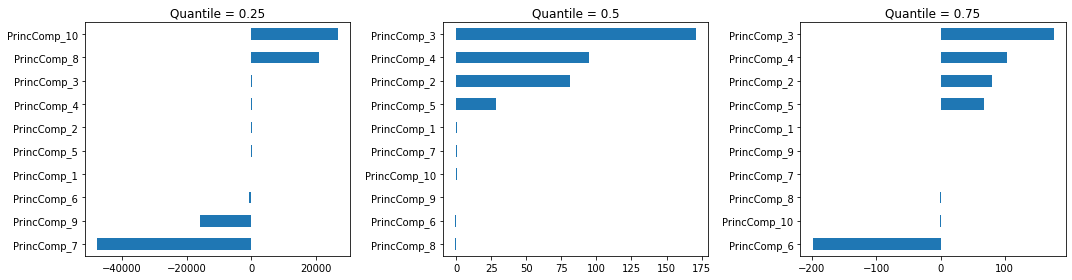

In [1273]:
Qreg_coefs['coef_value'] = (Qreg_coefs['coef'] ) 
Qreg_coefs = Qreg_coefs.sort_values(by=['quantile','coef_value'])

fig = plt.figure(figsize=(15, 4))

n = len(quantiles)

for i in range(n):
    plt.subplot(1, n, i+1)
    w = Qreg_coefs[Qreg_coefs['quantile']==quantiles[i]]
    w['coef'].plot.barh()
    plt.title('Quantile = ' + str(quantiles[i] ))

fig.tight_layout()
plt.show()

When predicting higher prices, the longitude, zip_codes and viiew will  highly affect prices.

while in prediicting lower  and medium prices of houses, prices will be more driven by sqft_living,	sqft_lot and floors features 

In [1274]:
quantiles = [0.25,0.5,0.75]
models = []
params = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['PrincComp_1'],res.params['PrincComp_2'],res.params['PrincComp_3'],res.params['PrincComp_4'],res.params['PrincComp_5'],res.params['PrincComp_6'],res.params['PrincComp_7'],res.params['PrincComp_8'],res.params['PrincComp_9'] ,res.params['PrincComp_10'] ] + res.conf_int().loc['PrincComp_1'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept','PrincComp_1_coef','PrincComp_2_coef','PrincComp_3_coef','PrincComp_4_coef','PrincComp_5_coef','PrincComp_6_coef', 'PrincComp_7_ coef', 'PrincComp_8.coef', 'PrincComp_9_coef' ,'PrincComp_10_coef' ,'cf_lower_bound', 'cf_upper_bound'])



In [1275]:
params

,qt,intercept,PrincComp_1_coef,PrincComp_2_coef,PrincComp_3_coef,PrincComp_4_coef,PrincComp_5_coef,PrincComp_6_coef,PrincComp_7_ coef,PrincComp_8.coef,PrincComp_9_coef,PrincComp_10_coef,cf_lower_bound,cf_upper_bound
0,0.25,413983.429244,0.647614,136.896076,55.609430,26.864716,648.654379,1104.907796,-84944.192791,35120.074083,-55070.125540,-12465.062657,0.597734,0.697495
1,0.50,516864.035059,0.724277,167.598924,85.785596,44.237949,578.594818,1541.001694,-100589.199504,71890.057594,-60957.156875,-13006.742227,0.670299,0.778255
2,0.75,625877.087117,0.906377,201.691149,110.440335,65.525466,676.224714,1900.146028,-123796.631292,85962.306873,-52659.641078,-11496.051781,0.829771,0.982982


In [1276]:
print("The mean squared error for the 25th regression:",metrics.mean_squared_error(y_test, Y_test_pred1))
print("The mean squared error for the 50th regression:",metrics.mean_squared_error(y_test, Y_test_pred2))
print("The mean squared error for the 75th regression:",metrics.mean_squared_error(y_test, Y_test_pred3))


The mean squared error for the 25th regression: 359480102704.7675
The mean squared error for the 50th regression: 365626156957.5703
The mean squared error for the 75th regression: 366720684190.40784


The MSEs of the quantiles are higher than the base model and hence are better suited for carrying out prediction for low, medium and high prices for houses 

# Ridge regression 

Ridge sums the squares of coefficient values (the L-2 norm) and multiplies it by some constant lambda. Compared to Lasso, this regularization term will decrease the values of coefficients, but is unable to force a coefficient to exactly 0.

In [1277]:
drop=['id','price']
X = house_data.drop(drop, axis=1)
y = house_data['price']

In [1278]:
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [1279]:
search.fit(X,y)
abs(search.best_score_) 

41033295736.8315

In [1280]:
search.best_params_

{'alpha': 0.01}

In [1281]:
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
ridge_model = (mean_squared_error(y,y_pred=ridge.predict(X)))
print("The mean squared error for the ridge regression:",ridge_model)
        

The mean squared error for the ridge regression: 40642620048.74137


In [1282]:
coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_,house_data.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': -0.048184764368647215,
 'bedrooms': 92.38562391942905,
 'condition': 95.90069621059949,
 'floors': 55214.47931872492,
 'grade': 62.121752579384605,
 'id': -34285.9167719569,
 'price': 40720.227573021664,
 'sqft_above': -2576.6902782812645,
 'sqft_basement': 19.350836804544446,
 'sqft_living': 5229.134367182195,
 'sqft_lot': 574535.8058352575,
 'view': 98643.23130334342,
 'waterfront': 25983.377139837678,
 'yr_built': -583.6196898140091,
 'yr_renovated': 603210.0621153784,
 'zipcode': -204712.91963339472}

In [1283]:
ridger2= metrics.r2_score(y,y_pred=ridge.predict(X))
print('R2 score for the ridge regression is {}'.format(ridger2) )

R2 score for the ridge regression is 0.6988292556182676





There is a 13% improvement of accuracy prediction from linear 57% to 70% hence ridge may be a better model than linear regression in predicting prices of houses 

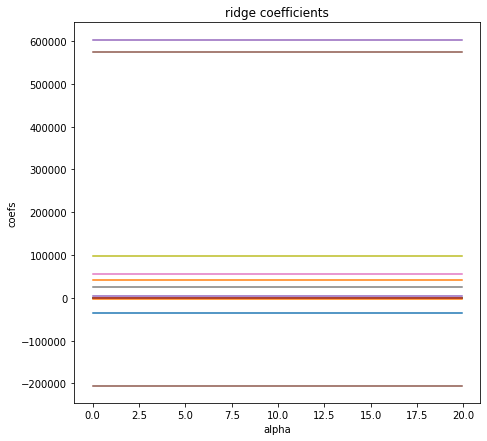

In [1284]:

coefsridge = [] 

# Building ridge for 200 values of alpha and write the coefficients into array
# 
alphasridge = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = Ridge(alpha=alphasridge[i])
    lasso.fit(X, y)
    coefsridge.append(ridge.coef_) 

# Building ridge coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasridge, coefsridge)
plt.title('ridge coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

# Lasso regression 

Lasso (sometimes stylized as LASSO or lasso) adds the sum of the coefficient values (the L-1 norm) multiplied by a constant lambda. This additional term penalizes the model for having coefficients that do not explain a sufficient amount of variance in the data. It also has a tendency to set the coefficients of the bad predictors mentioned above to 0. This makes Lasso useful in feature selection.

In [1285]:
from sklearn.linear_model import Lasso



# Splitting the data into training and test sets, building Lasso, 
# and choosing the regularization parameter with the help of GridSearch. 
# For that, we have to define the set of parameters for GridSearch. 
# In this case, a model with the highest R-squared score will give us the best parameters.
# 

import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)


lasso best parameters: {'alpha': 22.0}
lasso score: 0.7092220657049904
lasso MSE: 41280833976.20471
lasso best estimator coef: [-3.67256099e+04  3.60673826e+04  2.95432535e+02 -3.00675791e-02
  9.28662983e+03  5.45885441e+05  5.42612639e+04  2.83583955e+04
  1.00726929e+05 -1.05602547e+02 -1.41638946e+02 -2.64450520e+03
  1.60796188e+01 -6.09674349e+02  6.06017756e+05 -2.07013797e+05]


There is a 1% improvement of the r score in the lasso from the ridge. The difference is not that significant though 

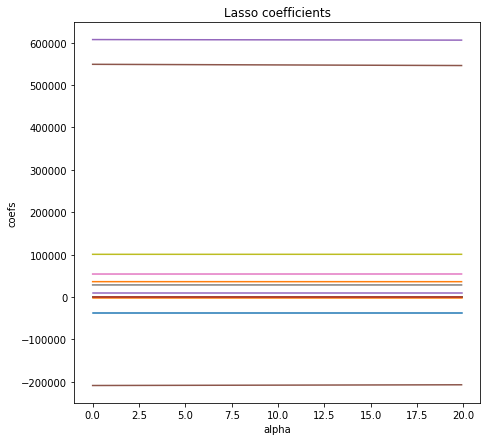

In [1286]:
#  Visualization
#

coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

# Elastic Net Regression 

Elastic Net includes both L-1 and L-2 norm regularization terms. This gives us the benefits of both Lasso and Ridge regression. It has been found to have predictive power better than Lasso, while still performing feature selection. We therefore get the best of both worlds, performing feature selection of Lasso with the feature-group selection of Ridge.

In [1287]:
from sklearn.linear_model import ElasticNet

In [1288]:
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [1289]:
search.fit(X,y)
search.best_params_
abs(search.best_score_)
print(search.best_params_)
print(abs(search.best_score_))

{'alpha': 1e-05, 'l1_ratio': 0.8}
41065039944.1675


In [1290]:
elastic=ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.8)
elastic.fit(X,y)
elastic_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(elastic_model)

40725757557.36127


In [1291]:
#Coeff from elastic net.
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
print(coef_dict_baseline)

{'bedrooms': -30550.779579220958, 'bathrooms': 40065.680236110275, 'sqft_living': 90.96112223800439, 'sqft_lot': -0.03375944529253876, 'floors': 6305.3668960592295, 'waterfront': 560550.9462452582, 'view': 55974.958148232065, 'condition': 26795.022755747716, 'grade': 94651.4211303859, 'sqft_above': 93.97096591995485, 'sqft_basement': 62.74284398395646, 'yr_built': -2389.403739017554, 'yr_renovated': 22.059066505726534, 'zipcode': -526.2350364259429, 'lat': 589497.9653495618, 'long': -193870.82932796667}


The co-eeficients show how many units the prices of the houses will rise or fall  given a one unit increase of the independent variables 

In [1292]:
#R2 score from elastic net 
elasticr2= metrics.r2_score(y,y_pred=elastic.predict(X))
print('R2 score for the elastic net regression is {}'.format(elasticr2) )

R2 score for the elastic net regression is 0.6982131884127806


The r2 score of elastic net is almost the same to that of ridge and a bit worse off from lasso 

In [1293]:
#Trying to compare the MSE Of the various regressions except quatile regression 
#
#elastic_model, lasso_model, ridge_model, linearmodel MSES
x = (40725757557.36127,41280833976.20471,40642620048.74137,13939180229.833775)
max(x)

41280833976.20471

Lasso Regression was the best model according to MSE. The Lasso and Elastic Net models traded a significant amount of variance for bias, and we see that our error has decreased.The ridge regression model traded some variance for bias, which ultimately lead to an overall larger error. 

According to the R_score Lasso was the best model for prediction  


Using ridge and elastic net would not be a bad idea as they both have high r score and MSE are above the basemodel 


# Follow up questions

Other regression models would be performed to get the best 
Also more features such as availability of social anemities, security parameters would be added to increase r_score of the models 